In [34]:
import pandas as pd
import gzip
import simplejson as json
import seaborn as sns
import re

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_review = getDF('resources/AMAZON_FASHION.json.gz')

In [3]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883636 entries, 0 to 883635
Data columns (total 12 columns):
overall           883636 non-null float64
verified          883636 non-null bool
reviewTime        883636 non-null object
reviewerID        883636 non-null object
asin              883636 non-null object
reviewerName      883544 non-null object
reviewText        882403 non-null object
summary           883103 non-null object
unixReviewTime    883636 non-null int64
vote              79900 non-null object
style             304569 non-null object
image             28807 non-null object
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 81.7+ MB


In [4]:
df_review.describe()

,overall,unixReviewTime
count,883636.00000,8.836360e+05
mean,3.90694,1.456751e+09
std,1.41828,4.430691e+07
min,1.00000,1.036973e+09
25%,3.00000,1.434240e+09
50%,5.00000,1.462234e+09
75%,5.00000,1.484266e+09
max,5.00000,1.538352e+09


In [5]:
df_review.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [6]:
df_meta = getDF('resources/meta_AMAZON_FASHION.json.gz')

In [7]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186637 entries, 0 to 186636
Data columns (total 15 columns):
title           186632 non-null object
image           132017 non-null object
brand           139957 non-null object
feature         123875 non-null object
rank            180222 non-null object
date            185001 non-null object
asin            186637 non-null object
description     15869 non-null object
price           17799 non-null object
also_view       11595 non-null object
also_buy        21642 non-null object
fit             4831 non-null object
details         885 non-null object
similar_item    317 non-null object
tech1           97 non-null object
dtypes: object(15)
memory usage: 22.8+ MB


In [8]:
df_meta.tail()

,title,image,brand,feature,rank,date,asin,description,price,also_view,also_buy,fit,details,similar_item,tech1
186632,JT Women's Elegant Off Shoulder Chiffon Maxi L...,[https://images-na.ssl-images-amazon.com/image...,JT,NaN,"9,835,890inClothing,ShoesJewelry(",5 star,B01HJGXL4O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186633,Microcosm Retro Vintage Black Crochet Lace One...,[https://images-na.ssl-images-amazon.com/image...,Microcosm,[Package Dimensions:\n \n7....,"11,390,771inClothing,ShoesJewelry(",5 star5 star (0%),B01HJHF97K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186634,Lookatool Classic Plain Vintage Army Military ...,[https://images-na.ssl-images-amazon.com/image...,Lookatool,"[Cotton+Polyester, Imported, Item type:Basebal...","972,275inClothing,ShoesJewelry(",5 star,B01HJGJ9LS,NaN,$8.53,"[B00XLECZMS, B0018MQAOY, B00N833I4Q, B074DQSPP...","[B07BHQ1FXL, B00XLECZMS, B07CJWM5WY, B07CS97C1...","class=""a-normal a-align-center a-spacing-smal...",NaN,NaN,NaN
186635,Edith Windsor Women's Deep V-neck Beaded Sequi...,[https://images-na.ssl-images-amazon.com/image...,Edith Windsor,[Product Dimensions:\n \n9....,"1,964,585inClothing,ShoesJewelry(",5 star,B01HJHTH5U,NaN,NaN,NaN,[B077ZLGMJ3],NaN,NaN,NaN,NaN
186636,Aeropostale Women's Sun & Waves Crop Cami L Gr...,[https://images-na.ssl-images-amazon.com/image...,NaN,[Product Dimensions:\n \n5 ...,"9,379,125inClothing,ShoesJewelry(",5 star,B01HJFNU7S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# subset data of interest
df_review = df_review[['asin', 'overall']]
df_meta = df_meta[['asin','brand','rank','price']]

In [10]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883636 entries, 0 to 883635
Data columns (total 2 columns):
asin       883636 non-null object
overall    883636 non-null float64
dtypes: float64(1), object(1)
memory usage: 20.2+ MB


In [11]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186637 entries, 0 to 186636
Data columns (total 4 columns):
asin     186637 non-null object
brand    139957 non-null object
rank     180222 non-null object
price    17799 non-null object
dtypes: object(4)
memory usage: 7.1+ MB


### Clean-up Data and Manage Datasets

In [12]:
df_review.overall.unique()

array([5., 2., 4., 3., 1.])

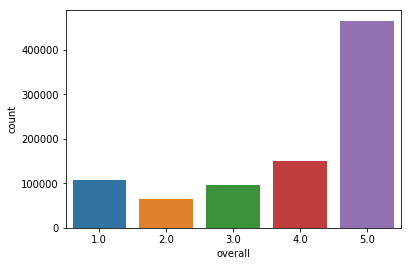

In [13]:
# sns.distplot(df_review['overall'], kde=False)
sns.countplot(df_review['overall'])

In [14]:
df_meta.brand.unique()

array(['Group Publishing (CO)', nan, 'Christopher Manos', ..., 'Hosaire',
       'Ginee18', 'Vincico'], dtype=object)

In [ ]:
# sns.countplot(df_meta['brand'])

In [31]:
df_meta['rank'].head()

0    13,052,976inClothing,Shoesamp;Jewelry(
1    11,654,581inClothing,Shoesamp;Jewelry(
2        19,308,073inClothing,ShoesJewelry(
3        19,734,184inClothing,ShoesJewelry(
4    10,558,646inClothing,Shoesamp;Jewelry(
Name: rank, dtype: object

In [33]:
df_meta['rankvalue'] = (x.str[0] for x in df_meta['rank'])
df_meta['rankvalue'].head()

0    <generator object <genexpr> at 0x000001E6DA99B...
1    <generator object <genexpr> at 0x000001E6DA99B...
2    <generator object <genexpr> at 0x000001E6DA99B...
3    <generator object <genexpr> at 0x000001E6DA99B...
4    <generator object <genexpr> at 0x000001E6DA99B...
Name: rankvalue, dtype: object

### Feature engineering

### Decision Tree Model

### Random Forest Model

### Logistic Regression Model

### Model Selection

### Conclusion